# Phân Tích Dữ Liệu Mẫu
### Mô tả:
Đây là một notebook mẫu bao gồm các bước cơ bản để xử lý và phân tích dữ liệu.

# 1. Import thư viện

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập hiển thị
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Nạp và xem dữ liệu

In [8]:

# Tải file csv lên google colab
from google.colab import files
# Upload file CSV
uploaded = files.upload()
# Đọc dữ liệu từ file CSV (ví dụ: 'Dataset.csv')
# Bạn cần thay đường dẫn bằng file của riêng bạn
data = pd.read_csv("Dataset.csv")
print("Thông tin dữ liệu:")
print(data.info())
print("\nXem trước dữ liệu:")
print(data.head())

Saving Dataset.csv to Dataset (4).csv
Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no.               7197 non-null   int64  
 1   id                7195 non-null   float64
 2   track_name        7196 non-null   object 
 3   size_bytes        7196 non-null   float64
 4   currency          7196 non-null   object 
 5   price             7196 non-null   float64
 6   rating_count_tot  7196 non-null   float64
 7   user_rating       7196 non-null   float64
 8   user_rating_ver   7196 non-null   float64
 9   ver               7196 non-null   object 
 10  cont_rating       7196 non-null   object 
 11  prime_genre       7196 non-null   object 
 12  sup_devices.num   7195 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 731.1+ KB
None

Xem trước dữ liệu:
   no.           id                       

# 3. Tiền xử lý dữ liệu

In [9]:
# Kiểm tra và xử lý giá trị bị thiếu
print("\nSố lượng giá trị thiếu mỗi cột:")
print(data.isnull().sum())
data.fillna(method='ffill', inplace=True)

# Loại bỏ các dòng hoặc cột không cần thiết
# data.drop(columns=['Unwanted_Column'], inplace=True)


Số lượng giá trị thiếu mỗi cột:
no.                 0
id                  2
track_name          1
size_bytes          1
currency            1
price               1
rating_count_tot    1
user_rating         1
user_rating_ver     1
ver                 1
cont_rating         1
prime_genre         1
sup_devices.num     2
dtype: int64


<ipython-input-9-2326da6c49ca>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# 4. Phân tích dữ liệu

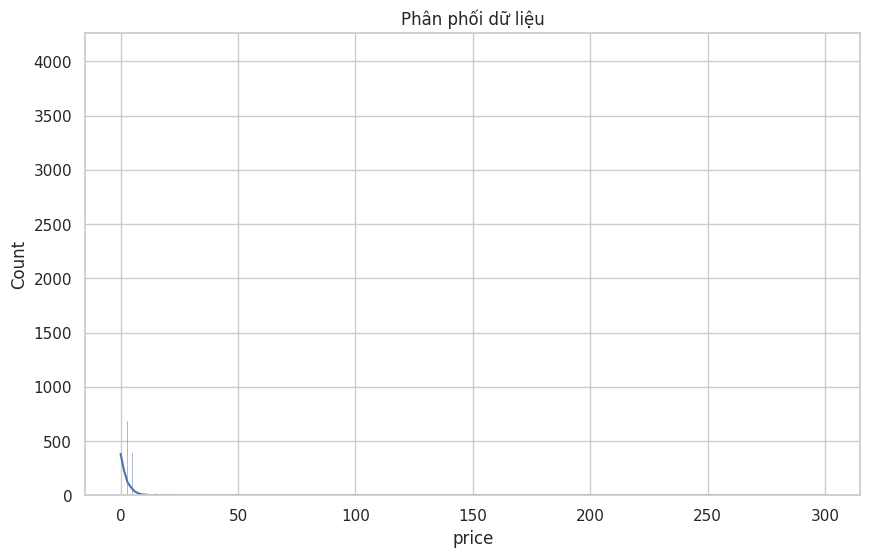

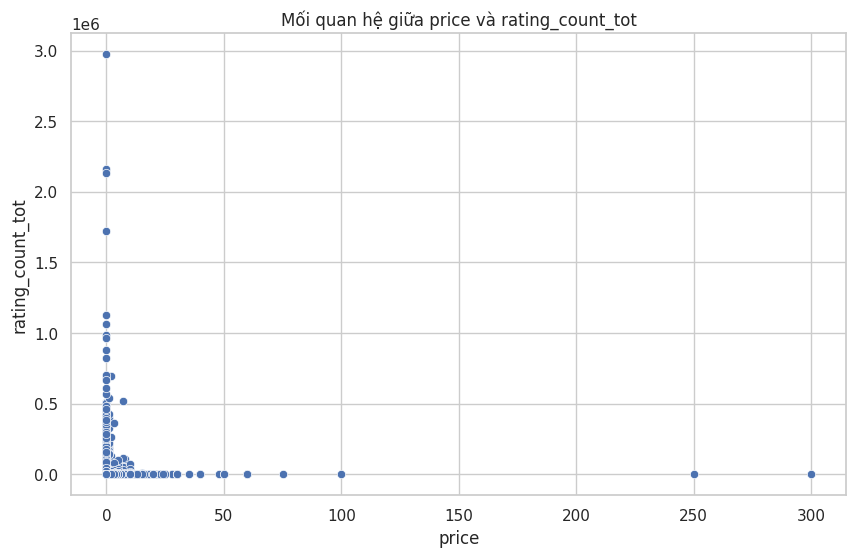

In [10]:
# Phân phối dữ liệu
sns.histplot(data['price'], kde=True)
plt.title("Phân phối dữ liệu")
plt.show()

# Quan hệ giữa hai biến
sns.scatterplot(x=data['price'], y=data['rating_count_tot'])
plt.title("Mối quan hệ giữa price và rating_count_tot")
plt.show()

# 5. Xây dựng mô hình (nếu cần)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Giả sử 'data' là DataFrame bạn đã nạp từ CSV
# data = pd.read_csv('path_to_your_file.csv')

# Tạo bản sao dữ liệu
data_copy = data.copy()

# Loại bỏ các cột không cần thiết
data_copy = data_copy.drop(columns=['track_name', 'currency', 'ver', 'cont_rating', 'prime_genre'])

# Label Encode các cột còn lại nếu cần
# Xác định các cột có kiểu dữ liệu string
string_columns = data_copy.select_dtypes(include='object').columns

# Áp dụng Label Encoding cho các cột string
encoder = LabelEncoder()
for col in string_columns:
    data_copy[col] = encoder.fit_transform(data_copy[col])

# Tách dữ liệu thành X và y
X = data_copy.drop(columns=['rating_count_tot'])
y = data_copy['rating_count_tot']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print("Độ chính xác của mô hình:", accuracy_score(y_test, y_pred))

## 6. Kết luận
Tổng kết lại những phân tích và kết quả.